<div style="text-align: right;">
  Autor: Jakub Wierzbicki
</div>


# Projekt Analizy Danych: Analiza Sprzedaży Mebli

### Temat projektu: "Analiza sprzedaży mebli w oparciu o dane zakupowe z magazynów"

## Cel projektu:

#### - Analiza wzorców zakupowych mebli w różnych okresach czasu

#### - Identyfikacja najpopularniejszych produktów i dostawców

#### - Ocena efektywności sprzedaży w różnych magazynach

#### - Wizualizacja kluczowych wskaźników sprzedaży

## Zakres projektu

#### 1.Wczytanie i oczyszczenie danych

#### 2.Analiza statystyczna danych

#### 3.Analiza czasowa sprzedaży

#### 4.Analiza produktów i dostawców

#### 5.Wizualizacja wyników

In [10]:
# Import niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Ustawienie stylu wykresów 
sns.set_style("whitegrid") 
%matplotlib inline

In [14]:
# 1. Wczytanie danych
df = pd.read_excel('dane1.xlsx', sheet_name='Arkusz1')

In [15]:
# Podgląd danych
print("Pierwsze 5 wierszy danych:")
display(df.head())

Pierwsze 5 wierszy danych:


,Data zakupu,Rok,Miesiąc,Dzień,Kod produktu,Nazwa produktu,Magazyn,Kierownik magazynu,Kolor,Kod dostawcy,...,Osoba do kontaktu,Czas realizacji,Cena produktu,Rabat %,Ilość zakupów,Wartość zakupów,Rabat,VAT,Cena + VAT,Wartość zakupów + VAT
0,2021-05-27,2021,5,27,REG004,Regał,Magazyn główny,Krzysztof,czerń,AGA004,...,Joanna,6,1290,0.05,5,6450,64.50,296.70,1586.70,7933.5
1,2021-05-26,2021,5,26,REG004,Regał,Magazyn główny,Krzysztof,czerń,BOD002,...,Katarzyna,6,780,0.02,4,3120,15.60,179.40,959.40,3837.6
2,2021-05-26,2021,5,26,BIU010,Biurko,Magazyn główny,Krzysztof,NaN,AGA004,...,Joanna,8,405,0.05,4,1620,20.25,93.15,498.15,1992.6
3,2021-05-25,2021,5,25,SZA007,Szafa,Magazyn główny,Krzysztof,orzech,JYS005,...,brak danych,7,2600,0.03,3,7800,78.00,598.00,3198.00,9594.0
4,2021-05-23,2021,5,23,REG004,Regał,Magazyn główny,Krzysztof,wenge,BRW001,...,Mirosław,16,1540,0.03,6,9240,46.20,354.20,1894.20,11365.2


In [16]:
# 2. Podstawowe informacje o danych
print("\nPodstawowe informacje o danych:")
display(df.info())


Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data zakupu            609 non-null    datetime64[ns]
 1   Rok                    609 non-null    int64         
 2   Miesiąc                609 non-null    int64         
 3   Dzień                  609 non-null    int64         
 4   Kod produktu           609 non-null    object        
 5   Nazwa produktu         609 non-null    object        
 6   Magazyn                609 non-null    object        
 7   Kierownik magazynu     609 non-null    object        
 8   Kolor                  539 non-null    object        
 9   Kod dostawcy           609 non-null    object        
 10  Nazwa dostawcy         609 non-null    object        
 11  Osoba do kontaktu      609 non-null    object        
 12  Czas realizacji        609 non-

None

In [17]:
# 3. Oczyszczanie danych
# Sprawdzenie brakujących wartości
print("\nBrakujące wartości w danych:")
display(df.isnull().sum())


Brakujące wartości w danych:


Data zakupu               0
Rok                       0
Miesiąc                   0
Dzień                     0
Kod produktu              0
Nazwa produktu            0
Magazyn                   0
Kierownik magazynu        0
Kolor                    70
Kod dostawcy              0
Nazwa dostawcy            0
Osoba do kontaktu         0
Czas realizacji           0
Cena produktu             0
Rabat %                   0
Ilość zakupów             0
Wartość zakupów           0
Rabat                     0
VAT                       0
Cena + VAT                0
Wartość zakupów + VAT     0
dtype: int64

In [19]:
# Wypełnienie brakujących kolorów
df['Kolor'] = df['Kolor'].fillna('nieokreślony')

In [20]:
# 4. Analiza statystyczna
print("\nStatystyki opisowe dla kolumn numerycznych:")
display(df.describe())


Statystyki opisowe dla kolumn numerycznych:


,Data zakupu,Rok,Miesiąc,Dzień,Czas realizacji,Cena produktu,Rabat %,Ilość zakupów,Wartość zakupów,Rabat,VAT,Cena + VAT,Wartość zakupów + VAT
count,609,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,2020-09-14 06:01:46.403940864,2020.287356,5.518883,15.865353,6.330049,1125.944171,0.032775,5.510673,6242.569787,38.505747,258.967159,1384.911330,7678.360837
min,2020-01-02 00:00:00,2020.000000,1.000000,1.000000,1.000000,120.000000,0.020000,1.000000,120.000000,2.400000,27.600000,147.600000,147.600000
25%,2020-05-14 00:00:00,2020.000000,3.000000,9.000000,4.000000,350.000000,0.030000,3.000000,1620.000000,12.500000,80.500000,430.500000,1992.600000
50%,2020-09-10 00:00:00,2020.000000,5.000000,16.000000,6.000000,1290.000000,0.030000,6.000000,4200.000000,28.000000,296.700000,1586.700000,5166.000000
75%,2021-01-18 00:00:00,2021.000000,8.000000,23.000000,8.000000,1500.000000,0.050000,8.000000,9300.000000,46.200000,345.000000,1845.000000,11439.000000
max,2021-05-27 00:00:00,2021.000000,12.000000,31.000000,29.000000,3100.000000,0.050000,10.000000,31000.000000,155.000000,713.000000,3813.000000,38130.000000
std,NaN,0.452901,3.317129,8.666041,4.197951,784.151698,0.010928,2.887183,5943.827716,33.757362,180.354890,964.506588,7310.908091


In [21]:
# 5. Analiza czasowa
# Konwersja daty na format datetime
df['Data zakupu'] = pd.to_datetime(df['Data zakupu'])

In [22]:
# Dodanie kolumny z miesiącem i rokiem
df['Miesiąc-Rok'] = df['Data zakupu'].dt.to_period('M')

In [23]:
# Wartość sprzedaży w czasie
sprzedaz_w_czasie = df.groupby('Miesiąc-Rok')['Wartość zakupów + VAT'].sum()

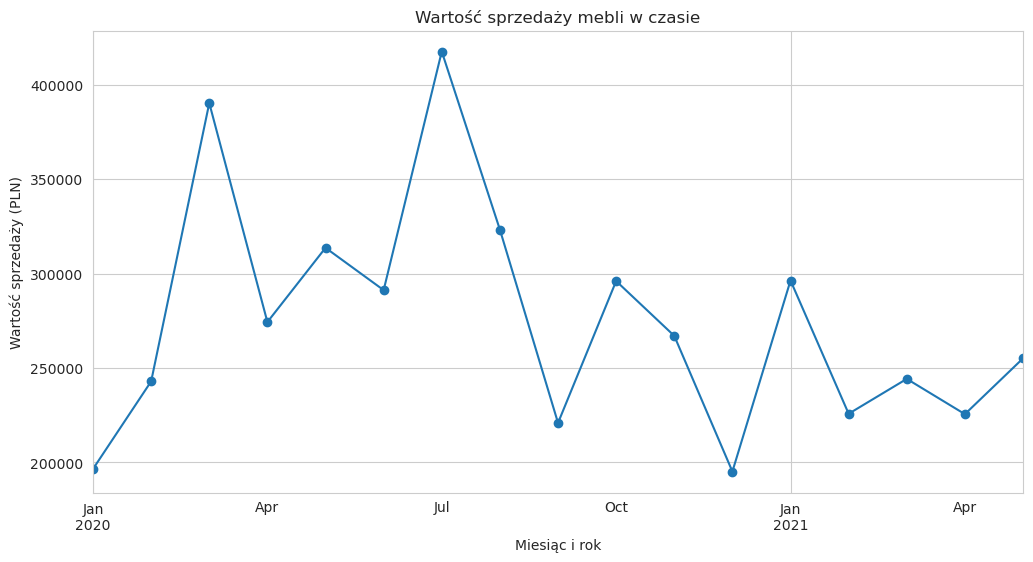

In [24]:
# Wykres sprzedaży w czasie
plt.figure(figsize=(12, 6))
sprzedaz_w_czasie.plot(kind='line', marker='o')
plt.title('Wartość sprzedaży mebli w czasie')
plt.xlabel('Miesiąc i rok')
plt.ylabel('Wartość sprzedaży (PLN)')
plt.grid(True)
plt.show()

In [25]:
# 6. Analiza produktów
# Najpopularniejsze produkty
top_produkty = df['Nazwa produktu'].value_counts().head(10)

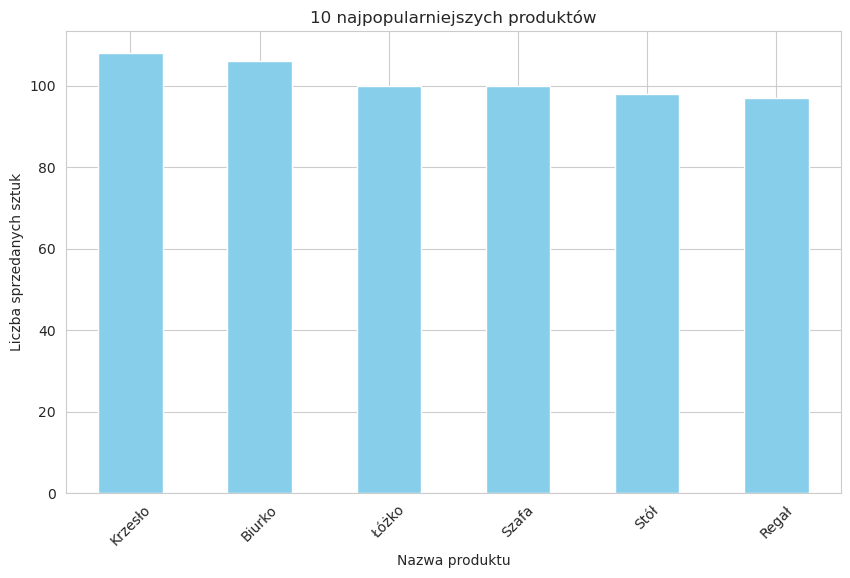

In [26]:
plt.figure(figsize=(10, 6))
top_produkty.plot(kind='bar', color='skyblue')
plt.title('10 najpopularniejszych produktów')
plt.xlabel('Nazwa produktu')
plt.ylabel('Liczba sprzedanych sztuk')
plt.xticks(rotation=45)
plt.show()

In [43]:
# 7. Analiza dostawców
# Wartość sprzedaży według dostawców
sprzedaz_dostawcy = df.groupby('Nazwa dostawcy')['Wartość zakupów + VAT'].sum().sort_values(ascending=False)

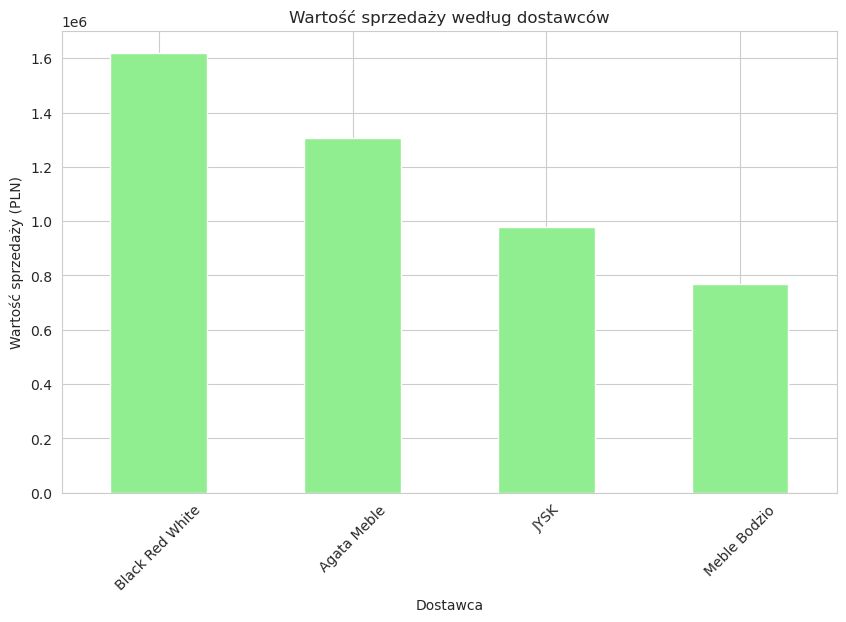

In [28]:
plt.figure(figsize=(10, 6))
sprzedaz_dostawcy.plot(kind='bar', color='lightgreen')
plt.title('Wartość sprzedaży według dostawców')
plt.xlabel('Dostawca')
plt.ylabel('Wartość sprzedaży (PLN)')
plt.xticks(rotation=45)
plt.show()

In [29]:
# 8. Analiza magazynów
# Porównanie sprzedaży między magazynami
sprzedaz_magazyn = df.groupby('Magazyn')['Wartość zakupów + VAT'].sum()

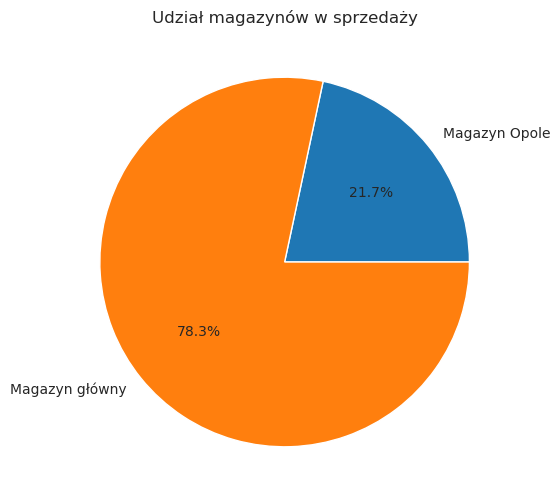

In [30]:
plt.figure(figsize=(8, 6))
sprzedaz_magazyn.plot(kind='pie', autopct='%1.1f%%')
plt.title('Udział magazynów w sprzedaży')
plt.ylabel('')
plt.show()

In [42]:
# 9. Analiza rabatów
sredni_rabat = df.groupby('Nazwa produktu')['Rabat %'].mean().sort_values(ascending=False).head(10)

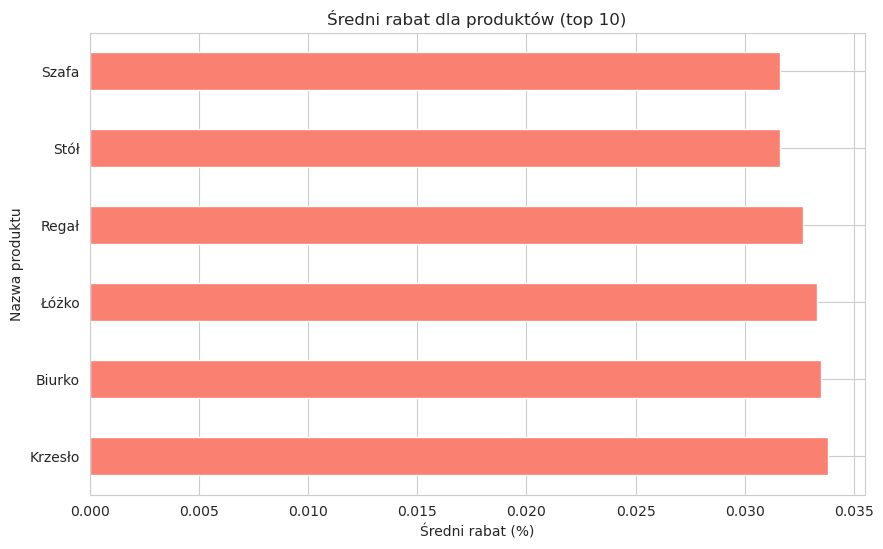

In [32]:
plt.figure(figsize=(10, 6))
sredni_rabat.plot(kind='barh', color='salmon')
plt.title('Średni rabat dla produktów (top 10)')
plt.xlabel('Średni rabat (%)')
plt.ylabel('Nazwa produktu')
plt.show()

In [33]:
# 10. Korelacje między zmiennymi
# Wybór kolumn numerycznych
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()

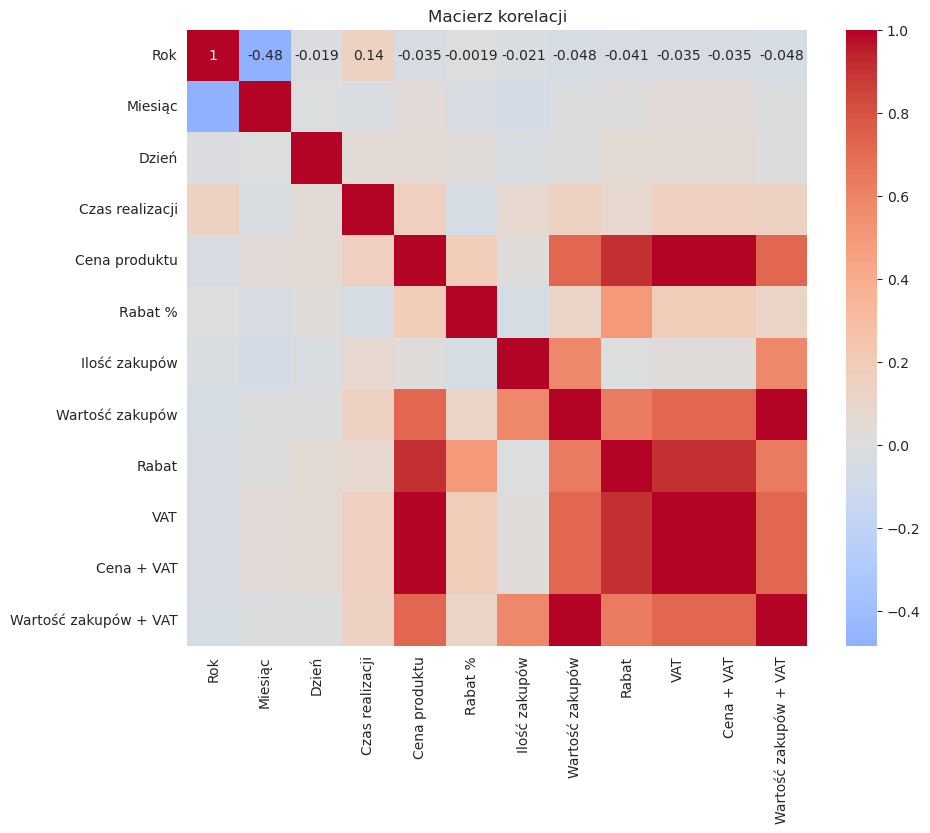

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Macierz korelacji')
plt.show()

# Podsumowanie analizy sprzedaży mebli

###  Ogólne wnioski z analizy:

>Przeanalizowaliśmy dane dotyczące zakupów mebli z okresu od kwietnia 2020 do maja 2021. Dane obejmowały informacje o produktach, dostawcach, magazynach, cenach, rabatach i wartościach zakupów.

###  Kluczowe wnioski

- &nbsp;Analiza czasowa sprzedaży


> 1. Wartość sprzedaży wykazywała sezonowe wahania, z wyraźnymi wzrostami w niektórych miesiącach (np. pod koniec roku).

- &nbsp; Najpopularniejsze produkty

> 1. Krzesła

> 2. Biurka

> 3. Łóżka oraz szafy

##### Produkty o najwyższej wartości sprzedaży to głównie meble wysokiej klasy (np. szafy i łóżka).

- &nbsp; Analiza dostawców

> Główni dostawcy to:
> - Black Red White
> - JYSK
> - Agata Meble

##### Niektórzy dostawcy oferowali wyższe rabaty, co mogło wpływać na wybór ich produktów.

- &nbsp; Efektywność magazynów

> Magazyn główny generował największą sprzedaż, podczas gdy Magazyn Opole miał mniejszy udział w ogólnych obrotach.

- &nbsp; Rabaty i ich wpływ na sprzedaż

> - Średni rabat wynosił ok. 3-5%.

> - Nie stwierdzono silnej korelacji między wysokością rabatu a wielkością sprzedaży. Klienci wybierali głównie ze względu na jakość i markę.

### Rekomendacje

#### 1. Zwiększenie promocji w okresach przedświątecznych – ponieważ wtedy sprzedaż naturalnie rośnie.

#### 2.Rozwój współpracy z najlepszymi dostawcami (np. Black Red White, JYSK) – ze względu na ich udział w sprzedaży.

#### 3.Analiza zapotrzebowania w Magazynie Opole – czy warto zwiększyć tam asortyment?

#### 4.Monitorowanie sprzedaży produktów premium – czy klienci są skłonni płacić więcej za lepszą jakość?

### Podsumowanie

#### Analiza wykazała kluczowe trendy w sprzedaży mebli, co pozwala na lepsze planowanie zakupów, zarządzanie magazynami i strategię marketingową. Warto kontynuować zbieranie danych, aby w przyszłości móc zastosować bardziej zaawansowaną analizę predykcyjną.